### Title: Best Markets for Advertising Tech Courses

#### Introduction:
This project is about finding the top two markets to advertise tech courses. The courses include web development, mobile development, and data science. Using stats like mean and median, the goal is to decide where to put ad money.

The end goal is to get more students by spending ad money wisely.

Context:
Why Using a Ready-Made Data Set:
I decided to go with this ready-made data set because running a new survey can be both time-consuming and expensive. This data set already has the kind of info I'm looking for, so it makes sense to start here.

What's This Data Set About:
This data set is from a 2017 survey run by freeCodeCamp, a well-known platform for learning to code. It's got responses from new coders on various topics, not just web development. This makes it a good fit for figuring out where to advertise our diverse range of tech courses.

Where to Download This Data Set:
If you're interested in taking a closer look, you can download the data set from freeCodeCamp's GitHub repository. Just search for '2017-fCC-New-Coders-Survey-Data.csv', and you'll find it there.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
file_path = '2017-fCC-New-Coders-Survey-Data.csv'
df = pd.read_csv(file_path, low_memory=False)

# Check the first few rows to get an idea of the data
df.head()
# Generate a frequency distribution table for the 'JobRoleInterest' column
# Taking percentages instead of absolute frequencies
job_role_interest_freq = df['JobRoleInterest'].value_counts(normalize=True) * 100

# Display the frequency table
job_role_interest_freq.head(10)


Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64

Checking Sample Representativity
Frequency Distribution of Job Interests
I've generated a frequency distribution table based on the 'JobRoleInterest' column. This shows the percentage of survey participants interested in different job roles.

Multiple Interests?
From the data, it's clear that people can have interests in more than just one subject. For example, some are interested in both "Full-Stack Web Developer" and "Front-End Web Developer".

Is the Sample Still Representative?
Since most people have interests in multiple subjects, this sample should still be useful for our analysis. The variety in job roles shows a broad interest in tech, which is what our courses cover.

Focus on Web and Mobile Development
The top roles people are interested in include Full-Stack Web Developer (11.77%) and Front-End Web Developer (6.44%), which are directly related to web development. Mobile Developer also shows up with 1.67%.

Let's visualize this data to make it easier to understand.

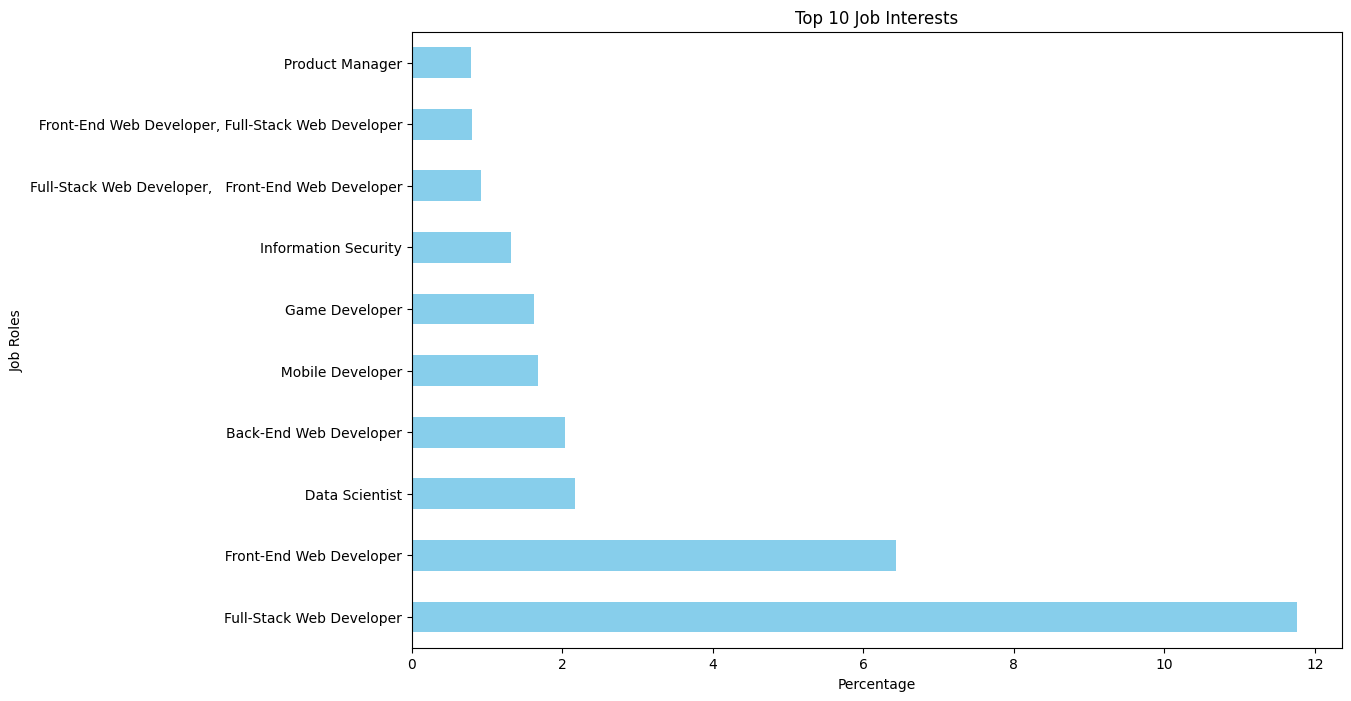

In [3]:
# Plotting the top 10 job interests
plt.figure(figsize=(12, 8))
job_role_interest_freq.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Job Interests')
plt.xlabel('Percentage')
plt.ylabel('Job Roles')
plt.show()


# Top 10 Job Interests Visualized

The bar chart above shows the top 10 job roles that participants are interested in. As you can see, "Full-Stack Web Developer" and "Front-End Web Developer" lead the pack, which is good news since our courses focus on web and mobile development.

## Next Steps

Next steps would be to dive into the locations of these new coders, figure out where the majority are located, and see how much they're willing to invest in learning. This will help us target our advertising more effectively.


In [5]:
# Drop all the rows where participants didn't answer what role they are interested in
df_filtered = df.dropna(subset=['JobRoleInterest'])

# Generate a frequency table for the 'CountryLive' variable
# Both absolute and relative frequencies
country_live_freq_abs = df_filtered['CountryLive'].value_counts()
country_live_freq_rel = df_filtered['CountryLive'].value_counts(normalize=True) * 100

# Display the frequency tables
country_live_freq_abs.head(10), country_live_freq_rel.head(10)


(United States of America    3125
 India                        528
 United Kingdom               315
 Canada                       260
 Poland                       131
 Brazil                       129
 Germany                      125
 Australia                    112
 Russia                       102
 Ukraine                       89
 Name: CountryLive, dtype: int64,
 United States of America    45.700497
 India                        7.721556
 United Kingdom               4.606610
 Canada                       3.802281
 Poland                       1.915765
 Brazil                       1.886517
 Germany                      1.828020
 Australia                    1.637906
 Russia                       1.491664
 Ukraine                      1.301550
 Name: CountryLive, dtype: float64)

# New Coders - Locations and Densities

## Frequency Table for Countries
I've generated a frequency table for the `CountryLive` variable, which shows both absolute and relative frequencies.

## Top Markets
Based on the frequency tables, the top two markets to consider for advertisement are:

- United States of America (45.7% of coders, 3125 people)
- India (7.7% of coders, 528 people)


In [7]:
# Make a copy of the DataFrame slice to avoid SettingWithCopyWarning
df_filtered = df.dropna(subset=['JobRoleInterest']).copy()

# Replace 0s with 1s in the 'MonthsProgramming' column to avoid division by 0
df_filtered['MonthsProgramming'].replace(0, 1, inplace=True)

# Create a new column for the amount of money each student spends each month
df_filtered['MoneyPerMonth'] = df_filtered['MoneyForLearning'] / df_filtered['MonthsProgramming']

# Keep only the rows that don't have a null value in the new column and the 'CountryLive' column
df_filtered = df_filtered.dropna(subset=['MoneyPerMonth', 'CountryLive'])

# Group the data by the 'CountryLive' column
# Explicitly set numeric_only=True to avoid FutureWarning
grouped = df_filtered.groupby('CountryLive').mean(numeric_only=True)
avg_spending_per_country = grouped['MoneyPerMonth'][countries_of_interest]

avg_spending_per_country


CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

### Spending Money for Learning

#### New Column for Monthly Spending
Created a new column showing how much each student spends monthly on learning. Replaced zeros with ones in 'MonthsProgramming' to avoid division by zero issues.

#### Average Monthly Spending by Country
After some data cleaning, here's the average monthly spending on learning in top countries:
- United States of America: $228
- India: $135
- United Kingdom: $46
- Canada: $114

#### Analysis
The U.S. and India are not only where most new coders are located but also where they spend the most on learning. These countries stand out as strong markets for our advertising efforts.


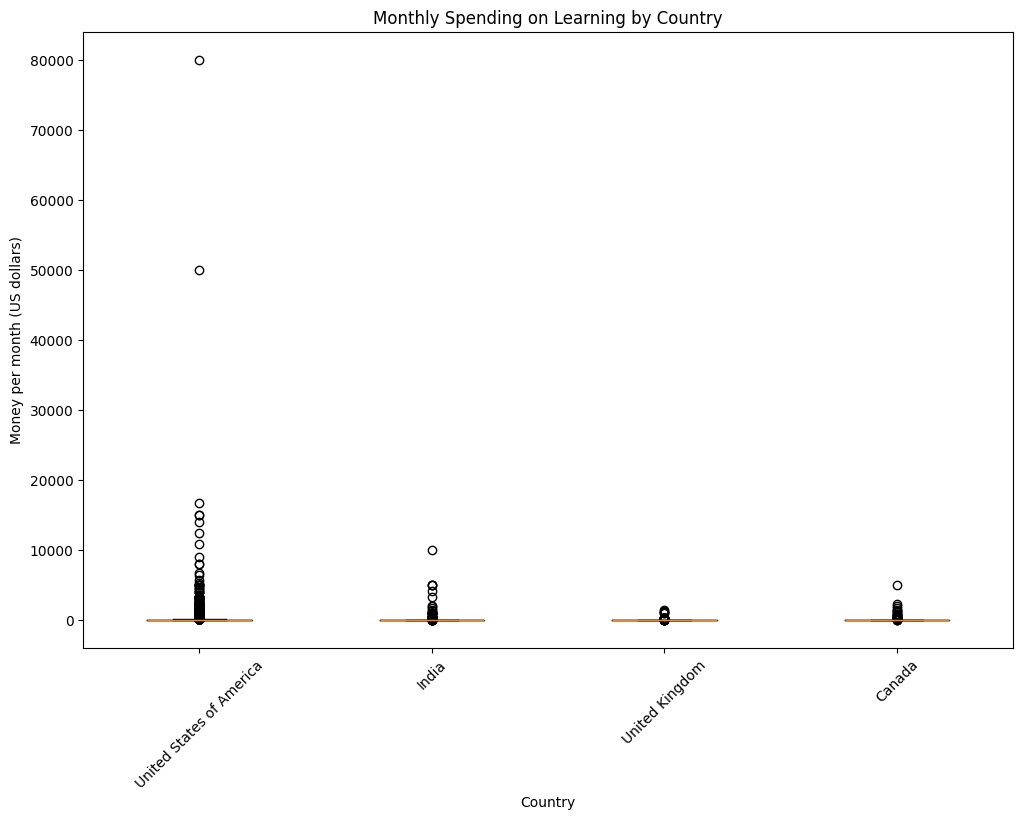

In [9]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the countries of interest
df_filtered_countries = df_filtered[df_filtered['CountryLive'].isin(countries_of_interest)]

# Generate box plots using matplotlib
plt.figure(figsize=(12, 8))
plt.boxplot([df_filtered_countries[df_filtered_countries['CountryLive'] == country]['MoneyPerMonth'] for country in countries_of_interest],
            labels=countries_of_interest)
plt.title('Monthly Spending on Learning by Country')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


### Box Plots for Monthly Spending by Country

The box plots visualize the distribution of monthly spending on learning in the U.S., India, the U.K., and Canada.

#### Observations

1. Extreme outliers are evident, especially for the U.S., with some spending more than 50000 dollars per month.
2. India also has outliers, with some individuals spending over 2500 dollars per month.

#### Next Steps

1. Eliminate these extreme outliers.
2. Recompute the mean values for each country.
3. Investigate any suspiciously high spending in more detail.
more detail.
 more detail.
 more detail.


### Choosing the Second Market for Advertising

#### Subscription Price
We offer subscriptions at 59 dollars per month. It's essential to target markets where people are willing to pay this amount or more.

#### Number of Potential Customers
The U.S. is the clear leader in terms of potential customers and spending. India comes next but with lower average spending.

#### Possible Decisions

1. **Two-Country Strategy**: Advertise in both the U.S. and India to capitalize on the large number of potential customers in both markets.
  
2. **Unequal Budget Allocation**: Consider spending more on advertising in the U.S., where the willingness to pay is higher (e.g., 70% in the U.S. and 30% in India).
  
3. **U.S.-Only Strategy**: Given the strong metrics, focusing only on the U.S. could also be a viable strategy.
  
4. **Consult the Marketing Team**: If available, sharing this data with a marketing team could provide additional insights.

#### Questions to Consider

- Does it make sense to advertise in more than two countries?
- Is an unequal budget allocation a wise strategy?
- Should we focus only on the U.S.?
- Would consulting a marketing team offer more domain-specific insights?
